### Titanic Dataset - Data Analysis
** Udacity Project **
@Shamshad Alam

---

** Five questions before looking into data **
 1. How did other factors such as age, sex, socio-economic status affected the probability to survive
 2. Distribution of people by continuous and categorical variables
 3. How much amount each people on an average paid to travel in Titanic
 4. Is there any significant relationship between people in a particular age group with other variables such as amount they paid
 5. Is it possible to determine missing data, if any, based on data we have in other fields in the same row

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pylab, pyplot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pylab.plt.style.use("seaborn-colorblind")

In [3]:
titanic_df = pd.read_csv("titanic-data.csv")

In [4]:
# Let's have a quick look at data
print ("# Rows = %d, # Columns = %d" % titanic_df.shape)
titanic_df.head(4).T

# Rows = 891, # Columns = 12


,0,1,2,3
PassengerId,1,2,3,4
Survived,0,1,1,1
Pclass,3,1,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
Sex,male,female,female,female
Age,22,38,26,35
SibSp,1,1,0,1
Parch,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803
Fare,7.25,71.2833,7.925,53.1


In [5]:
# Let's count number of non-null field for each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Let's print some stats about each field
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning and Preprocessing
---

In [7]:
# Define a mapping to make column name human
# readable whenever required
_h = {
    "PassengerId": "Passenger Id",
    "Survived": "Survived",
    "Pclass": "Ticket Class",
    "Age": "Age (Years)",
    "SibSp": "# of Siblings/Spouses aboard the Titanic",
    "Parch": "# of Parents/Children aboard the Titanic",
    "Embarked": "Port of Embarkation"
}
SurviveDict = {0: "Not Survived", 1: "Survived"}
ClassDict = {1: "First", 2: "Second", 3: "Third"}

In [8]:
# Replace port of embarkation with actual city name
titanic_df.replace({"Embarked": {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}}, inplace=True)
titanic_df.Embarked.value_counts().to_frame().T

,Southampton,Cherbourg,Queenstown
Embarked,644,168,77


In [9]:
titanic_df["SexEncoded"] = titanic_df.Sex.replace({"male": 0, "female": 1})

In [10]:
def age_group(value):
    if not np.isnan(value):
        if value <= 14: return "0-14"
        elif value <= 24: return "14-24"
        elif value <= 35: return "24-35"
        elif value <= 50: return "35-50"
        elif value <= 65: return "50-65"
        else: return "65+"
    return value
titanic_df["Age Group"] = titanic_df.Age.apply(age_group)
titanic_df["Age Group"].value_counts().to_frame().T

,24-35,14-24,35-50,0-14,50-65,65+
Age Group,220,200,153,77,56,8


In [11]:
# Create a new feature family size by adding
# up Parch and SibSp
titanic_df["Family Size"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
titanic_df['Family Size'].value_counts().to_frame().T

,1,2,3,4,6,5,7,11,8
Family Size,537,161,102,29,22,15,12,7,6


In [12]:
# Create a new feature with deck from the cabin number
titanic_df['Deck'] = titanic_df.Cabin.str[0]
titanic_df['Deck'].fillna('NA').value_counts().to_frame().T

,NA,C,B,D,E,A,F,G,T
Deck,687,59,47,33,32,15,13,4,1


In [13]:
# Extract title from Name
titanic_df["Title"] = titanic_df.Name.str.extract(" ([A-Za-z]+)\.")
titanic_df["Title"].value_counts().to_frame().T

,Mr,Miss,Mrs,Master,Dr,Rev,Col,Major,Mlle,Countess,Ms,Lady,Jonkheer,Don,Mme,Capt,Sir
Title,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


In [14]:
title_count = titanic_df["Title"].value_counts()
threshold = 10
def func(value):
    if title_count[value] < threshold:
        return "Rare Title"
    return value
titanic_df['TitleType'] = titanic_df['Title'].apply(func)
titanic_df['TitleType'].value_counts().to_frame().T

,Mr,Miss,Mrs,Master,Rare Title
TitleType,517,182,125,40,27


### Visualizations

Starting with heatmap of pearson correlation cofficient to see how each variable is related to other variables

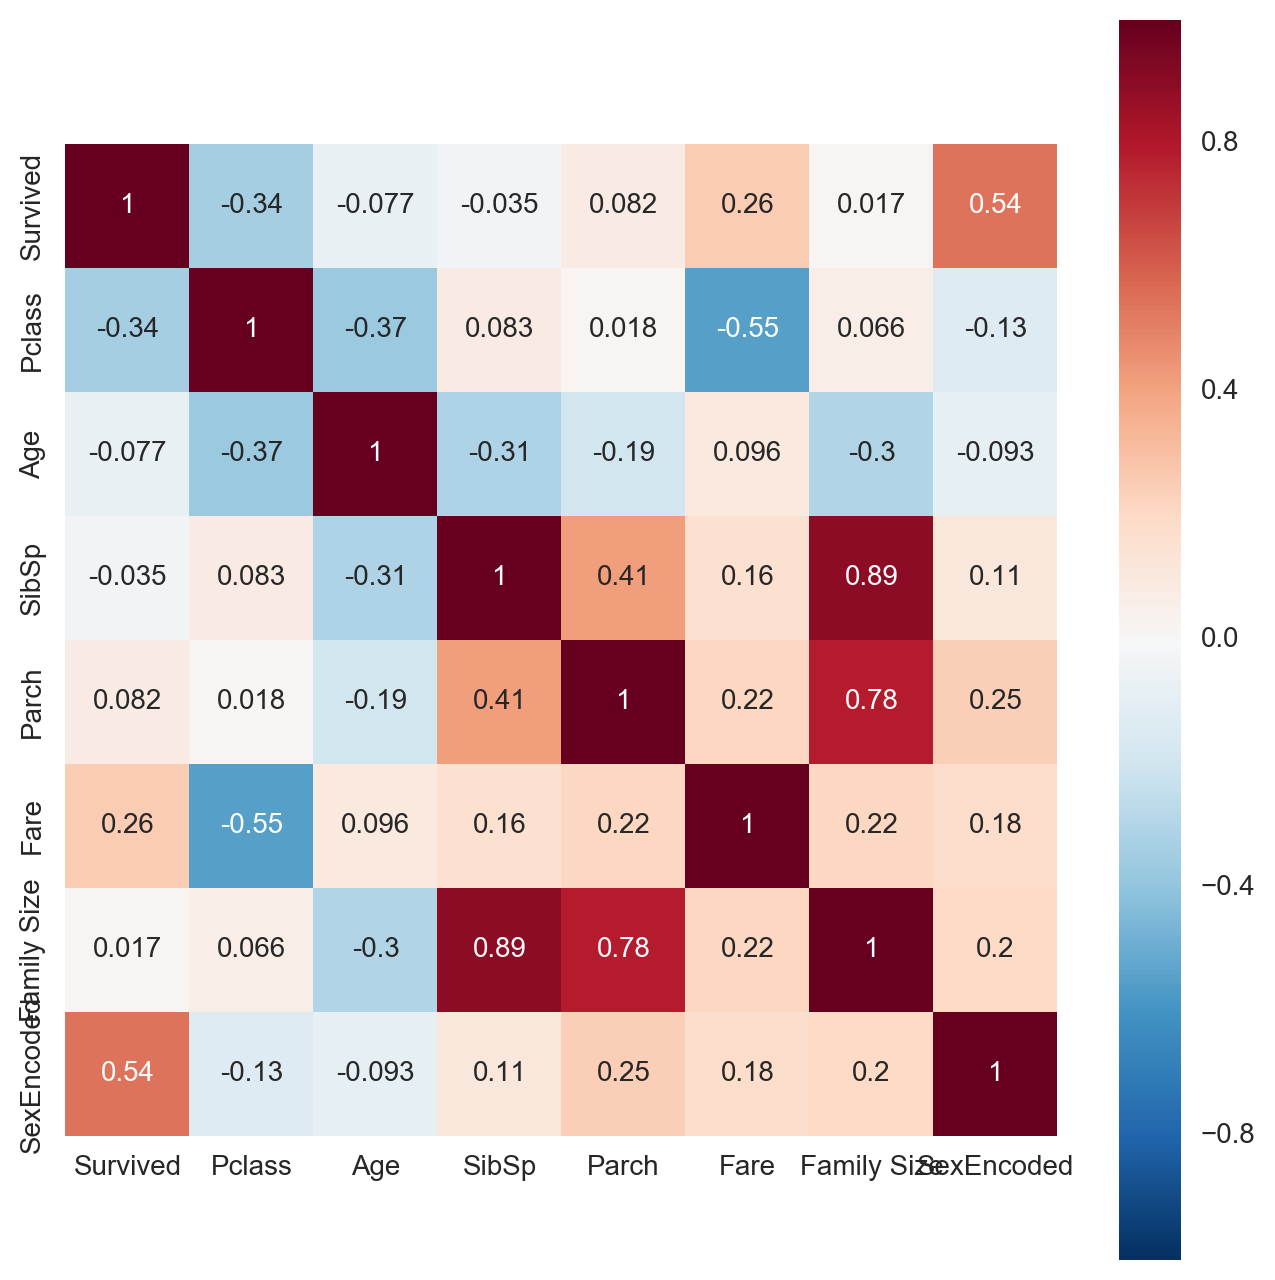

In [15]:
corr = titanic_df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Family Size", "SexEncoded"]].corr()
pylab.plt.figure(figsize=(8, 8))
sns.heatmap(corr, square=True, annot=True)

In [16]:
corr.Survived.to_frame().T

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,SexEncoded
Survived,1.0,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.543351


__Observation from Pearson correlation coefficient__
* **Gender** is highly related with survival rate followed by **Ticket Class(Pclass)** and **Fare**. **Age** and **Family Size** seems to have little impact on survival rate. 
* The **+ve** pearson correlation coefficient for fare is indicating that passenger who paid more price likely to be a survivor

---

** General distribution of each variable in the data **

In [17]:
def bar_plot(dataframe, col, replace=None, normalize=False):
    if replace:
        series = dataframe[col].replace(replace)
    else:
        series = dataframe[col]
    counts = series.value_counts()
    if normalize:
        total = counts.sum()
        counts = counts / counts.sum()
    sub_plot = counts.plot.bar(rot=0, width=0.9)
    sub_plot.title.set_text(_h[col] if col in _h else col)
    sub_plot.tick_params(axis='both', which='major', labelsize=8)
    sub_plot.tick_params(axis='both', which='minor', labelsize=8)
    return sub_plot

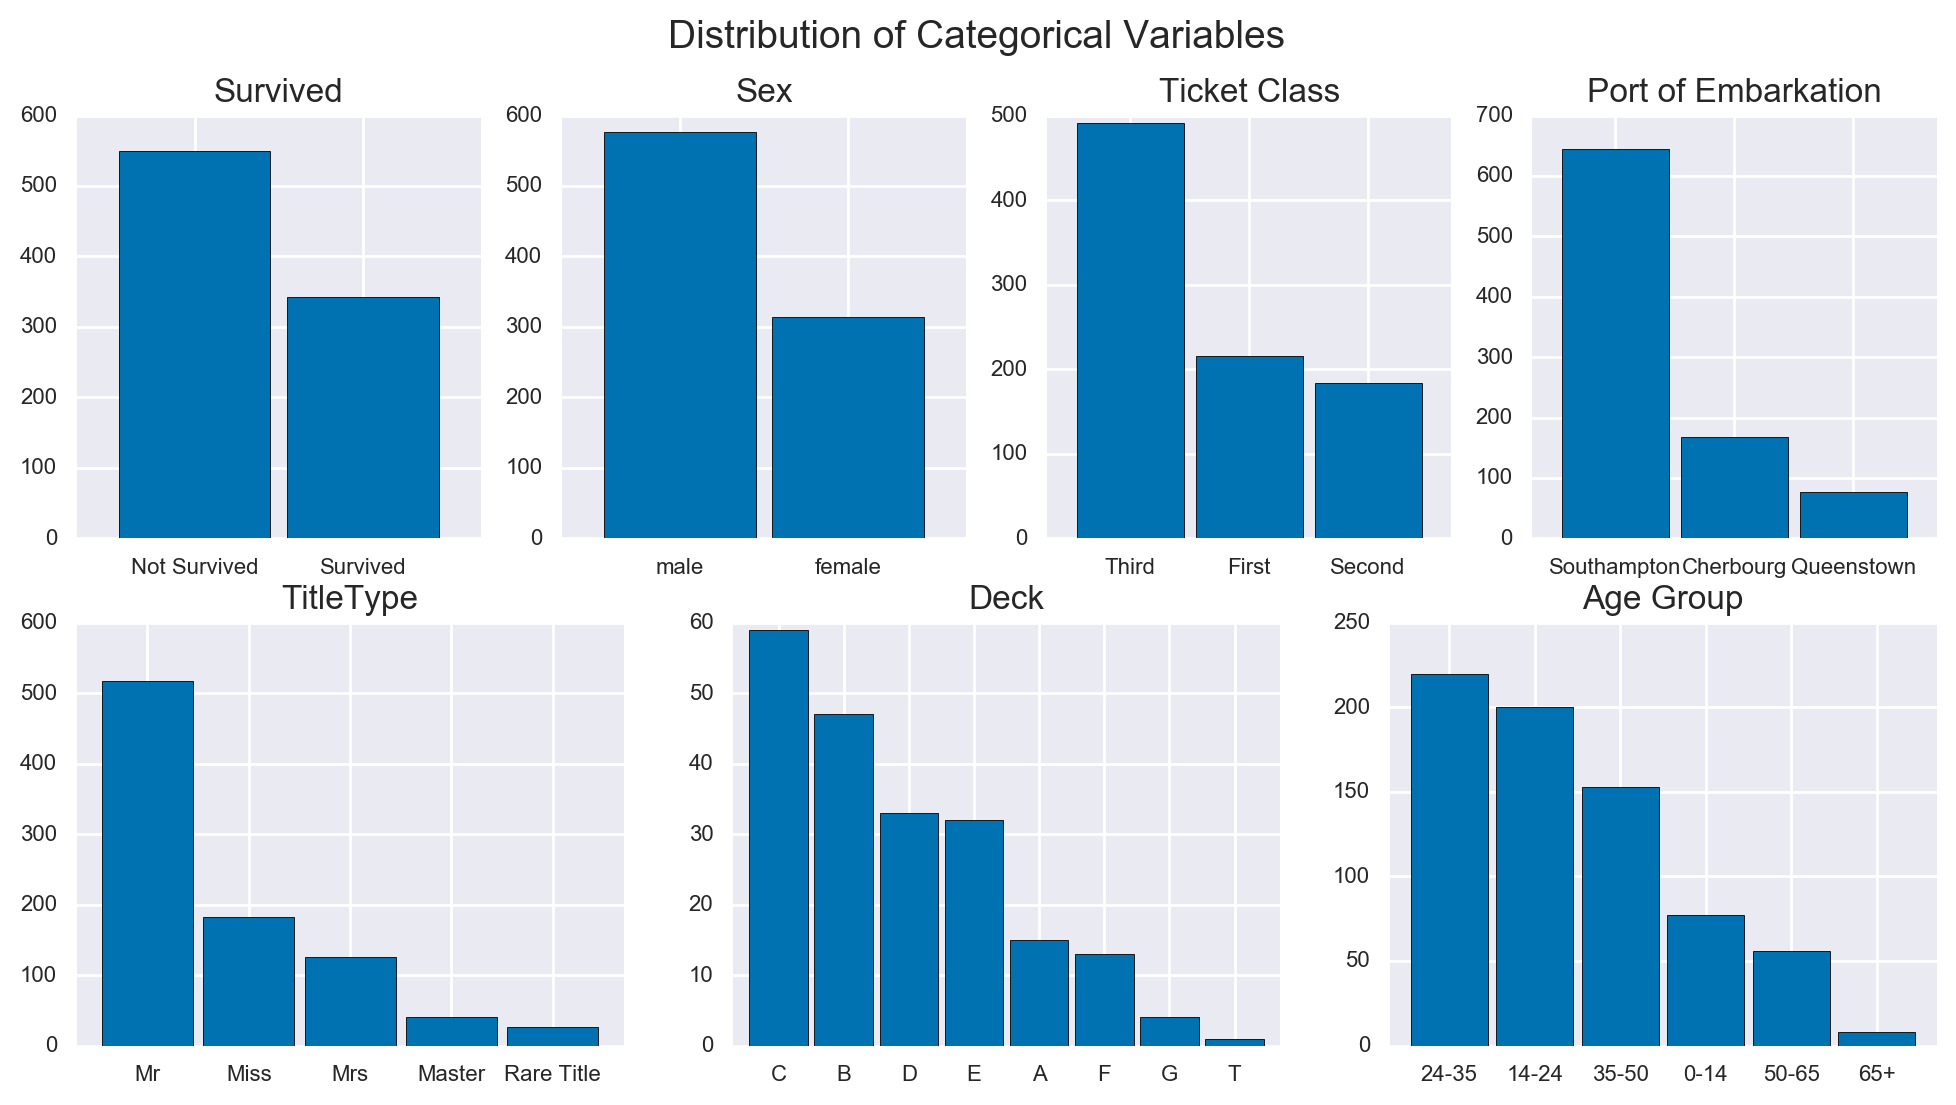

In [19]:
plot_settings = [
    ("Survived", SurviveDict, 241),
    ("Sex", None, 242),
    ("Pclass", ClassDict, 243),
    ("Embarked", None, 244),
    ("TitleType", None, 234),
    ("Deck", None, 235),
    ("Age Group", None, 236),
]
fig = pylab.figure(figsize=(12, 6))
for row, replace, plot in plot_settings:
    fig.add_subplot(plot)
    bar_plot(titanic_df, row, replace, normalize=False)
_ = fig.suptitle("Distribution of Categorical Variables", fontsize=14)